# Zadanie 1

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [ ]:
# dane treningowe
timesteps = 50
data = np.tan(np.arange(timesteps))

In [ ]:
def prepare_data(data, timesteps):
    X, y = [], []
    for i in range(len(data)-timesteps-1):
        X.append(data[i:(i+timesteps)])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

X, y = prepare_data(data, 10)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=16)


Epoch 1/5
2/2 [==============================] - 1s 14ms/step - loss: 1835.8081
Epoch 2/5
2/2 [==============================] - 0s 11ms/step - loss: 1828.7927
Epoch 3/5
2/2 [==============================] - 0s 14ms/step - loss: 1825.6913
Epoch 4/5
2/2 [==============================] - 0s 11ms/step - loss: 1819.8297
Epoch 5/5
2/2 [==============================] - 0s 13ms/step - loss: 1815.1913


In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

1/1 [==============================] - 0s 172ms/step - loss: 1.3725
Loss: 1.3724638223648071


In [ ]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 136ms/step


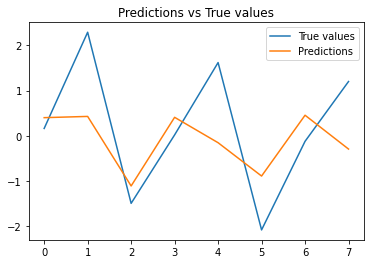

In [ ]:
import matplotlib.pyplot as plt

# narysuj dane testowe
plt.plot(y_test, label='True values')

# narysuj przewidywane wartości
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()


# Zadanie 2

In [ ]:
import tensorflow as tf

import numpy as np
import os
import time

In [ ]:
path_to_file = tf.keras.utils.get_file('/content/shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras.optimizers import RMSprop

# Wczytanie danych tekstowych
with open('shakespeare.txt', 'r') as f:
    text = f.read().lower()
print('Długość tekstu:', len(text))

# Tworzenie słownika znaków
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# Przygotowanie sekwencji danych wejściowych i wyjściowych
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i:i + maxlen])
    next_chars.append(text[i + maxlen])
print('Liczba sekwencji:', len(sentences))

# Przygotowanie danych wejściowych i wyjściowych
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Długość tekstu: 1115394
Liczba sekwencji: 371785


In [ ]:
# Definicja modelu sieci rekurencyjnej
model = Sequential()
model.add(SimpleRNN(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

# Kompilacja modelu
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Nauczanie modelu
model.fit(x, y, batch_size=128, epochs=5)

Epoch 1/5
2905/2905 [==============================] - 84s 29ms/step - loss: 2.6879
Epoch 2/5
2905/2905 [==============================] - 81s 28ms/step - loss: 2.6137
Epoch 3/5
2905/2905 [==============================] - 84s 29ms/step - loss: 2.6420
Epoch 4/5
2905/2905 [==============================] - 83s 29ms/step - loss: 2.6148
Epoch 5/5
2905/2905 [==============================] - 81s 28ms/step - loss: 2.5595


In [ ]:
# Generowanie tekstu
start_index = np.random.randint(0, len(text) - maxlen - 1)
generated_text = text[start_index:start_index + maxlen]
print('--- Początek generowanego tekstu: "' + generated_text + '"')

for i in range(400):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(generated_text):
        x_pred[0, t, char_indices[char]] = 1
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.argmax(preds)
    next_char = indices_char[next_index]
    generated_text += next_char
    generated_text = generated_text[1:]

print('--- Wygenerowany tekst: "' + generated_text + '"')

--- Początek generowanego tekstu: " merry words.

queen elizabeth:
if he we"
--- Wygenerowany tekst: "s troes he the to tho there the there th"


# Zadanie 3

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ustalenie hiperparametrów
max_features = 10000  # maksymalna liczba słów
maxlen = 100  # maksymalna długość sekwencji słów
batch_size = 32
embedding_dims = 50  # liczba wymiarów przestrzeni osadzeń słów
hidden_dims = 32  # liczba neuronów w warstwie ukrytej

# załadowanie danych IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# dostosowanie długości sekwencji słów
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# utworzenie modelu sieci neuronowej
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(SimpleRNN(hidden_dims))
model.add(Dense(1, activation='sigmoid'))

# kompilacja modelu
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# uczenie modelu
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test))

17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/2
782/782 [==============================] - 126s 158ms/step - loss: 0.5124 - accuracy: 0.7382 - val_loss: 0.3949 - val_accuracy: 0.8299
Epoch 2/2
782/782 [==============================] - 96s 123ms/step - loss: 0.3192 - accuracy: 0.8681 - val_loss: 0.4216 - val_accuracy: 0.8169


In [ ]:
# Przygotowanie słownika mapowania identyfikatorów słów na słowa
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Wybór losowej sekwencji tekstowej z testowego zestawu danych
sample = np.random.randint(len(x_test))
text = x_test[sample]
label = y_test[sample]

# Wartości w zakresie 0-2 są zarezerwowane dla specjalnych znaków, zacznijmy od indeksu 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
print(f"Tekst: {decoded_review}")
print(f"Etykieta:{label}")

# Dokonanie predykcji na przykładowych danych
prediction = model.predict(np.array([text]))
print(f"Predykcja: {prediction[0]}")

1641221/1641221 [==============================] - 0s 0us/step
Tekst: living notably in his on screen discussions with wayans then again his real life affair with the ? was inconsistent also br br if seagal wants to become a more ? actor then he should do what a fellow action figure did in ? cop put humorous material or situations in the script where the actor has no choice but to react in a comical way otherwise leave the wise cracks and the ? attempts at humor out of it while chasing a serial killer seagal is not a natural humor type of guy it did not work br br
Etykieta:0
1/1 [==============================] - 0s 138ms/step
Predykcja: [0.35419813]


# Zadanie 4

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# set hyperparameters
max_features = 10000  # maximum number of words
maxlen = 100  # maximum sequence length
batch_size = 32
embedding_dims = 50  # dimensionality of word embeddings
hidden_dims = 32  # number of neurons in the hidden layer

# load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# adjust sequence lengths
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# build the neural network model
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(hidden_dims))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
782/782 [==============================] - 30s 35ms/step - loss: 0.4151 - accuracy: 0.8046 - val_loss: 0.3358 - val_accuracy: 0.8524
Epoch 2/2
782/782 [==============================] - 11s 14ms/step - loss: 0.2600 - accuracy: 0.8966 - val_loss: 0.3423 - val_accuracy: 0.8478


In [ ]:
# Przygotowanie słownika mapowania identyfikatorów słów na słowa
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Wybór losowej sekwencji tekstowej z testowego zestawu danych
sample = np.random.randint(len(x_test))
text = x_test[sample]
label = y_test[sample]

# Wartości w zakresie 0-2 są zarezerwowane dla specjalnych znaków, zacznijmy od indeksu 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
print(f"Tekst: {decoded_review}")
print(f"Etykieta:{label}")

# Dokonanie predykcji na przykładowych danych
prediction = model.predict(np.array([text]))
print(f"Predykcja: {prediction[0]}")

Tekst: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this movie takes the voice of terror and makes it better holmes is protecting an ? in switzerland and is on the trail of professor ? who has become a nazi this is a better version of holmes in a wwii world ? does a great job with holmes as a spy and a detective see this if you liked the voice of terror
Etykieta:1
1/1 [==============================] - 0s 325ms/step
Predykcja: [0.9894131]


# Zadanie 5

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000  # Liczba słów, które chcemy zastosować w analizie
maxlen = 100  # Maksymalna liczba słów w recenzji
batch_size = 32  # Liczba recenzji przetwarzana jednocześnie

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# Dopełnij recenzje zerami, jeśli są za krótkie, lub obetnij, jeśli są za długie
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Model sieci rekurencyjnej z GRU
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Trenowanie modelu
print('Training...')
model.fit(input_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(input_test, y_test))

# Ocena modelu
scores = model.evaluate(input_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

25000 train sequences
25000 test sequences


input_train shape: (25000, 100)
input_test shape: (25000, 100)
Training...
Epoch 1/2
782/782 [==============================] - 358s 454ms/step - loss: 0.4229 - accuracy: 0.8006 - val_loss: 0.3361 - val_accuracy: 0.8541
Epoch 2/2
782/782 [==============================] - 350s 448ms/step - loss: 0.2543 - accuracy: 0.8975 - val_loss: 0.3489 - val_accuracy: 0.8600
Test accuracy: 0.8599600195884705


# Zadanie 6

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [ ]:
timesteps: int = 10
batch_size: int = 8
epochs: int = 20
hidden_dims: int = 32

In [ ]:
# 1
def rastragin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

input_data = np.random.random((1000, 10)) # 1000 sequences of length 10
output_data = np.apply_along_axis(rastragin, 1, input_data)
output_data /= np.max(output_data)

In [ ]:
train_size = int(len(input_data) * 0.8)
X_train, X_test = input_data[:train_size], input_data[train_size:]
y_train, y_test = output_data[:train_size], output_data[train_size:]

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_dims, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(input_data, output_data, epochs=epochs, batch_size=batch_size)
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

Epoch 1/20
125/125 [==============================] - 2s 5ms/step - loss: 0.0329
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0188
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0176
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0162
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0145
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0140
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0117
Epoch 8/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0124
Epoch 9/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0109
Epoch 10/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 11/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0089
Epoch 12/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0084
Epoch 13/20
125/125 [====

In [ ]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


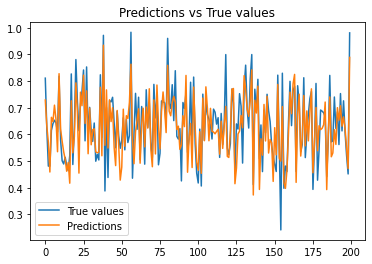

In [ ]:
import matplotlib.pyplot as plt

# narysuj dane testowe
plt.plot(y_test, label='True values')

# narysuj przewidywane wartości
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()

In [ ]:
# 2
timesteps: int = 10
batch_size: int = 8
epochs: int = 20
hidden_dims: int = 32

In [ ]:
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = -a * np.exp(-b * np.sqrt(1/d * np.sum(x**2)))
    sum2 = -np.exp(1/d * np.sum(np.cos(c*x)))
    return sum1 + sum2 + a + np.exp(1)

input_data = np.random.uniform(low=-5.0, high=5.0, size=(1000, 2)) # 1000 samples of 2-dimensional data
output_data = np.apply_along_axis(ackley, 1, input_data)
output_data /= np.max(output_data)

In [ ]:
train_size = int(len(input_data) * 0.8)
X_train, X_test = input_data[:train_size], input_data[train_size:]
y_train, y_test = output_data[:train_size], output_data[train_size:]

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_dims, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(input_data, output_data, epochs=epochs, batch_size=batch_size)
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

Epoch 1/20
125/125 [==============================] - 3s 5ms/step - loss: 0.2969
Epoch 2/20
125/125 [==============================] - 1s 4ms/step - loss: 0.0624
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 7/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 8/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 9/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 10/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 11/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 12/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 13/20
125/125 [====

In [ ]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


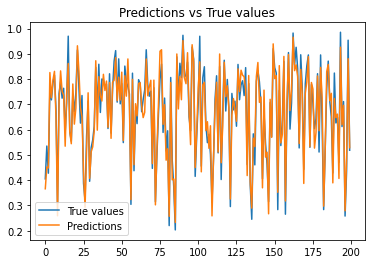

In [ ]:
import matplotlib.pyplot as plt

# narysuj dane testowe
plt.plot(y_test, label='True values')

# narysuj przewidywane wartości
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()

In [ ]:
# 3
timesteps: int = 10
batch_size: int = 8
epochs: int = 20
hidden_dims: int = 32

In [ ]:
def rosenbrock(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

input_data = np.random.uniform(low=-2.0, high=2.0, size=(1000, 2)) # 1000 samples of 2-dimensional data
output_data = np.apply_along_axis(rosenbrock, 1, input_data)
output_data /= np.max(output_data)

In [ ]:
train_size = int(len(input_data) * 0.8)
X_train, X_test = input_data[:train_size], input_data[train_size:]
y_train, y_test = output_data[:train_size], output_data[train_size:]

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_dims, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mae')

In [ ]:
model.fit(input_data, output_data, epochs=epochs, batch_size=batch_size)
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

Epoch 1/20
125/125 [==============================] - 2s 3ms/step - loss: 0.1329
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.1086
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0705
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0637
Epoch 7/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0608
Epoch 8/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0560
Epoch 9/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0544
Epoch 10/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 11/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 12/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 13/20
125/125 [====

In [ ]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


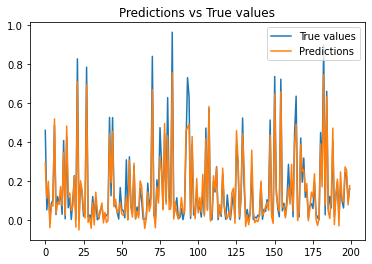

In [ ]:
import matplotlib.pyplot as plt

# narysuj dane testowe
plt.plot(y_test, label='True values')

# narysuj przewidywane wartości
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()

# Zadanie 7